In [1]:
from fastai.vision import *

# Creating My own dataset from Google Images

__For Downloading google images from Search__

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into the server

In [2]:
folder = ['Wolf', 'Coyote','Dog']
file = ['urls_Wolf.txt', 'urls_Coyote.txt','urls_Dog.txt']

### Downlod Images

In [3]:
path = Path('data/Canis')

In [4]:
for i in range(3):
    dest = path/folder[i]
    dest.mkdir(parents=True, exist_ok = True)
    download_images(path/file[i], dest, max_pics=200)

__Verify The images__

In [5]:
classes = ['Wolf', 'Coyote', 'Dog']

In [6]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=200)

Wolf


Coyote


Dog


# View Data

In [7]:
path

PosixPath('data/Canis')

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

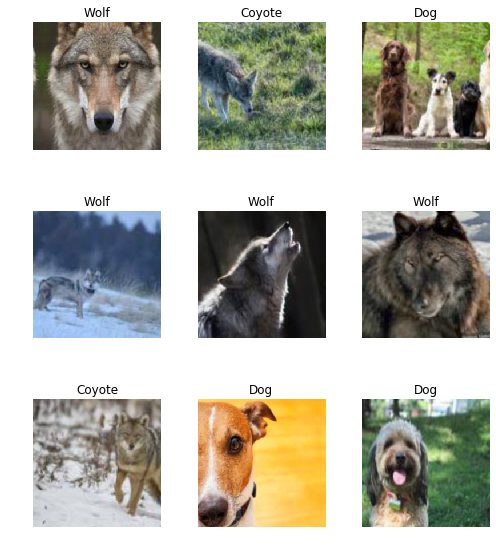

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Coyote', 'Dog', 'Wolf'], 3, 192, 48)

# Train Model

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn

Learner(data=ImageDataBunch;

Train: LabelList (192 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Coyote,Coyote,Coyote,Coyote,Coyote
Path: data/Canis;

Valid: LabelList (48 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Coyote,Coyote,Wolf,Wolf,Wolf
Path: data/Canis;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.613294,1.123453,0.416667,00:03
1,1.077540,0.447132,0.125000,00:01
2,0.810064,0.218928,0.083333,00:01
3,0.680567,0.160713,0.083333,00:01


In [13]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.348839,0.442378,0.104167,00:02
1,0.473355,1.135864,0.187500,00:02


In [16]:
learn.save('stage-2')

### I ran It twice
I didn't select a good learning rate, The first time I run it.

In [22]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (192 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Coyote,Coyote,Coyote,Coyote,Coyote
Path: data/Canis;

Valid: LabelList (48 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Coyote,Coyote,Wolf,Wolf,Wolf
Path: data/Canis;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.45E-04


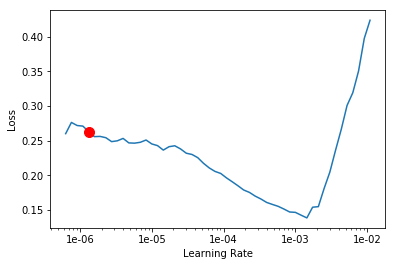

In [25]:
learn.recorder.plot(suggestion=True)

In [26]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.411986,0.244540,0.125000,00:02
1,0.373595,0.203320,0.062500,00:02


In [27]:
learn.save('stage-3')

__That's a preety accurate model :DD__

# Interpretation

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

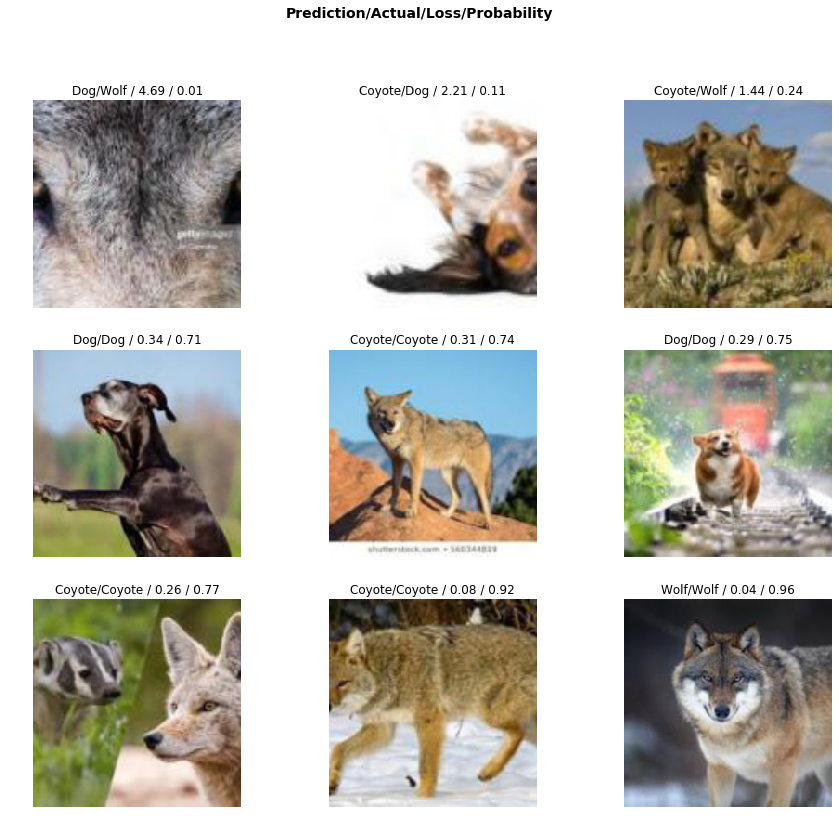

In [29]:
interp.plot_top_losses(9,figsize=(15,13))

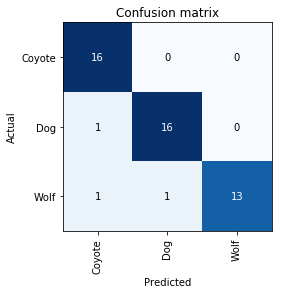

In [30]:
interp.plot_confusion_matrix()

# Clenaing Up

In [31]:
from fastai.widgets import *

In [32]:
db = (ImageList.from_folder(path).split_none().label_from_folder().transform(get_transforms(), size=224).databunch())

In [33]:
learn_cln = cnn_learner(db, models.resnet34,metrics=error_rate)
learn.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (192 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Coyote,Coyote,Coyote,Coyote,Coyote
Path: data/Canis;

Valid: LabelList (48 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Coyote,Coyote,Wolf,Wolf,Wolf
Path: data/Canis;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [34]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [35]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

# Make data from cleaned data

I deleted one or two file. Let's run it Again.

In [36]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder='.', valid_pct=0.2, csv_labels='cleaned.csv',
                              ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats) 

# Train Model Again

In [37]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.717554,0.838409,0.312500,00:02
1,1.133924,0.178436,0.041667,00:01
2,0.847514,0.090288,0.062500,00:02
3,0.720445,0.063817,0.041667,00:01


In [39]:
learn.save('cstage-1')

In [40]:
learn.unfreeze()

In [41]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.268904,0.261563,0.062500,00:02


In [44]:
learn.load('cstage-1')

Learner(data=ImageDataBunch;

Train: LabelList (192 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Coyote,Coyote,Coyote,Coyote,Coyote
Path: data/Canis;

Valid: LabelList (48 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Coyote,Coyote,Wolf,Wolf,Wolf
Path: data/Canis;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


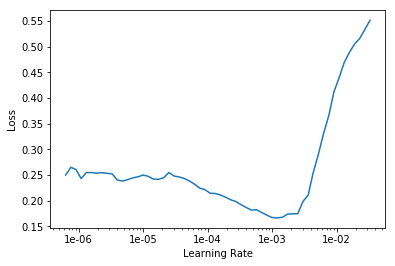

In [46]:
learn.recorder.plot()

In [47]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(4e-05,4e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.295093,0.146763,0.083333,00:02
1,0.215655,0.147497,0.062500,00:02
2,0.173284,0.127681,0.041667,00:02


In [48]:
learn.save('stage-final')

__That's a more accurate model :DD__

# Interpretation Again

In [49]:
interp = ClassificationInterpretation.from_learner(learn)

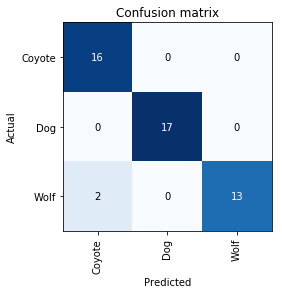

In [50]:
interp.plot_confusion_matrix()

_That's enough perfectionism :3_

# Model in Production

First thing first, let's export the content of our Learner object for production:

In [51]:
learn.export()

In [52]:
defaults.device = torch.device('cpu')

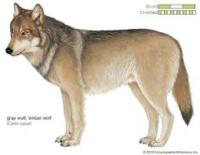

In [53]:
img = open_image(path/'Wolf'/'00000021.jpg')
img

In [54]:
learn = load_learner(path)

In [55]:
pred_class, pred_idx, outputs = learn.predict(img)

In [57]:
pred_class, pred_idx, outputs

(Category Wolf, tensor(2), tensor([4.1247e-05, 1.5793e-06, 9.9996e-01]))

In [58]:
pred_class

Category Wolf

__This model is being hosted on render as an web app.__ [Canis Classifier](https://canis-classifier.onrender.com/)🐺

_Thanks For Reading :D_